import tensorflow framwrok

# Tensorflow Framwork 란?

#### 1. 텐서플로우는 엄밀히 말하면, 연산 기능이 포함된 플로우차트 도구.
#### 2. 텐서플로우는 텐서(Tensor)라는 다차원 배열과 연산기능이 정의된 노드(Node), <br> 그리고 노드 간 연결통로를 만들어 텐서가 노드를 거쳐갈 수 있도록 하는 엣지(Edge)로 구성되어있다.

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

get MNIST data

In [2]:
#용어 정리
epoch = "데이터셋의 트레이닝 완료 횟수"
Tensor = ["텐서플로우는 연산을 담당하는 노드와 노드 사이 다리역할을 하는 엣지가 있다."
        , "텐서는 이 엣지를 타고 흘러 노드로 들어가 연산되고, 또 엣지로 타고흐른다."]

tf_placeholder = "Tensorflow에서 사용하는 다차원 배열 자료형인 Tensor 규격에 맞춰주는 API"

In [5]:
from tensorflow.examples.tutorials.mnist import input_data


#MNIST는 28x28 크기를 가진 5만5천개의 데이터셋
#따라서 이를 2차원 벡터로 모두 수치로 표현하면 [55000, 784] 벡터크기를 가짐
mnist = input_data.read_data_sets("./MNIST_dataset/")
print(len(mnist.train.images))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_dataset/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_dataset/train-labels-idx1-ubyte.gz
Extracting ./MNIST_dataset/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_dataset/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
55000


In [6]:
#28 * 28 vector 
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
n_epochs = 40
batch_size = 50

# input vector 784 
# [784, 1] x [784, 300] = [300, 1]
# [300, 1] x [300, 100] = [100, 1]
# [100, 1] x [100, 10] = [10, 1]

In [7]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

neuron layer create

In [9]:
#커스텀 히든레이어
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs + n_neurons)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        
        if activation is not None:
            return activation(Z)
        else:
            return Z

neural network modeling for tensorboard

custom api for hidden layer

In [7]:
"""
# 텐서플로우를 활용하지 않고, 우리가 직접 히든레이어를 만들 수도 있다.
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")
"""

'\n# \xed\x85\x90\xec\x84\x9c\xed\x94\x8c\xeb\xa1\x9c\xec\x9a\xb0\xeb\xa5\xbc \xed\x99\x9c\xec\x9a\xa9\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xea\xb3\xa0, \xec\x9a\xb0\xeb\xa6\xac\xea\xb0\x80 \xec\xa7\x81\xec\xa0\x91 \xed\x9e\x88\xeb\x93\xa0\xeb\xa0\x88\xec\x9d\xb4\xec\x96\xb4\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x93\xa4 \xec\x88\x98\xeb\x8f\x84 \xec\x9e\x88\xeb\x8b\xa4.\nwith tf.name_scope("dnn"):\n    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",\n                           activation=tf.nn.relu)\n    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",\n                           activation=tf.nn.relu)\n    logits = neuron_layer(hidden2, n_outputs, name="outputs")\n'

tensorflow api for hidden layer

In [10]:
with tf.name_scope("dnn"):
    #두 개의 히든레이어 층을 생성
    #dense 메서드는 텐서플로우가 제공하는 보다 쉽게 히든레이어를 생성할 수 있도록 도와주는 기능
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

compute loss_function

In [11]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
    tf.summary.scalar("loss_function",loss) ## 오차율 변화량을 스칼라 그래프로 표현하기

train

In [12]:
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

evaluation

In [13]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

(0, 'Train accuracy:', 0.98, 'Val accuracy:', 0.907)
(1, 'Train accuracy:', 0.98, 'Val accuracy:', 0.9236)
(2, 'Train accuracy:', 0.9, 'Val accuracy:', 0.9326)
(3, 'Train accuracy:', 0.96, 'Val accuracy:', 0.9406)
(4, 'Train accuracy:', 0.88, 'Val accuracy:', 0.9444)
(5, 'Train accuracy:', 0.98, 'Val accuracy:', 0.9506)
(6, 'Train accuracy:', 0.92, 'Val accuracy:', 0.953)
(7, 'Train accuracy:', 0.98, 'Val accuracy:', 0.957)
(8, 'Train accuracy:', 0.92, 'Val accuracy:', 0.9594)
(9, 'Train accuracy:', 0.98, 'Val accuracy:', 0.962)
(10, 'Train accuracy:', 1.0, 'Val accuracy:', 0.9626)
(11, 'Train accuracy:', 0.96, 'Val accuracy:', 0.9658)
(12, 'Train accuracy:', 0.98, 'Val accuracy:', 0.969)
(13, 'Train accuracy:', 1.0, 'Val accuracy:', 0.9678)
(14, 'Train accuracy:', 0.94, 'Val accuracy:', 0.969)
(15, 'Train accuracy:', 0.98, 'Val accuracy:', 0.9702)
(16, 'Train accuracy:', 0.98, 'Val accuracy:', 0.971)
(17, 'Train accuracy:', 0.98, 'Val accuracy:', 0.9708)
(18, 'Train accuracy:', 0.98, 

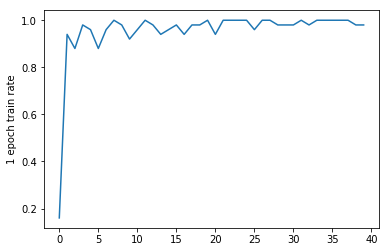

In [14]:
init = tf.global_variables_initializer()
merged_summary_op = tf.summary.merge_all()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    now_acc = []
    summary_writer = tf.summary.FileWriter("./tensorflow_log/MNIST_V_log",graph_def=sess.graph_def)
    for epoch in range(n_epochs): 
        # 1번의 ephoch 마다
        #준비한 데이터셋을 트레이닝한다.
        i = 0
       
        
        for iteration in range(mnist.train.num_examples // batch_size):
            #batch_size 만큼 트레이닝 입력
            #50개 씩 숫자 이미지를 가져온다.(가져오는 이미지는 모두 수치화로 표현)
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            # image,  number
            
            #트레이닝
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            x1 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            if iteration == 0:
                now_acc.append(x1)
            
            
            #오차 변화율을 지켜보기 위한 트레이닝
            session = sess.run(merged_summary_op, feed_dict={X: X_batch, y: y_batch})
            summary_writer.add_summary(session,epoch*(mnist.train.num_examples // batch_size) + i)
            
            i = i+1
        

        
        #55000 / 50 = 1100
        #따라서 1100번씩 수행하면서 학습 결과를 비교한다.
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,y: mnist.validation.labels})        
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val) # epoch가 40번
    
    summary_writer.close()
    plt.plot(now_acc)
    plt.ylabel("1 epoch train rate")
    plt.show()
    
    
    #학습시킨 딥러닝 모델 저장하기 "Checkpoint file save"
    save_path = saver.save(sess, "./Traning_saver/my_testTraning_MNIST2_fin.ckpt")

# Loss function
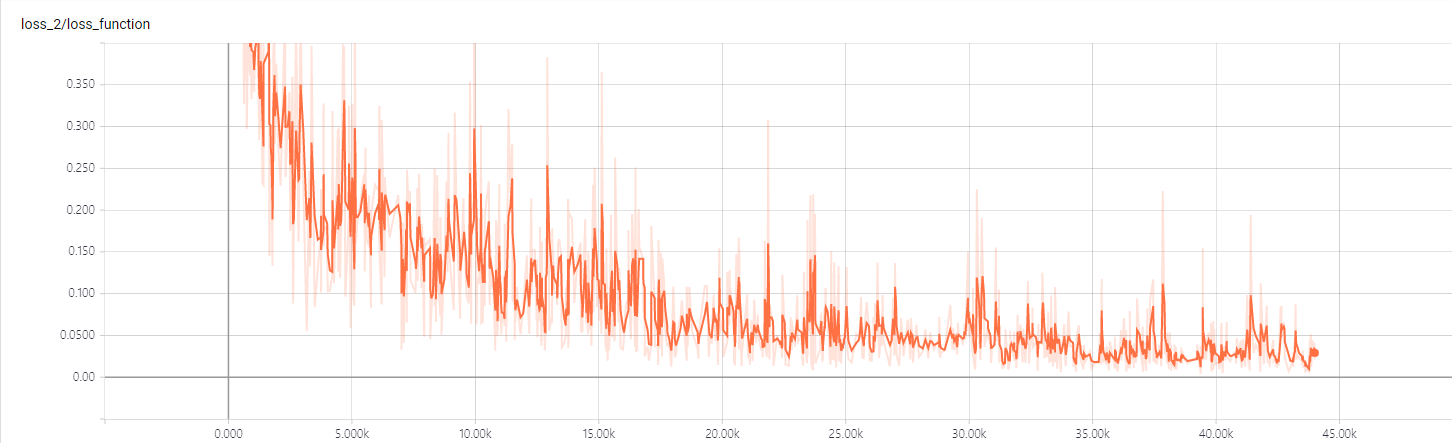


** 학습이 진행될 때 마다 오차율 감소 **